Using only one of the next datasets.
- https://www.kaggle.com/datasets/thedevastator/airport-city-mappings-and-aggregations
- https://www.kaggle.com/datasets/eugeniyosetrov/flights-data
- https://www.kaggle.com/datasets/imtkaggleteam/alzheimer-allftd-t-test

1.  Perform  data analysis as follows:
  - Propose at least 2 questions about the dataset.
  - Use visualizations and relations between variables to support your analysis in answering these questions.
  - Perform any necessary cleaning steps, scaling ...etc.

2. Design two different neural networks by Keras API
3. Apply the algorithms listed below:
  - KNN
  - Logistic Regression
  - SVM
  - Naive Bayes Classifier
  - K-mean
4. For each model:
  - Report model performance.
  - Discuss your findings and observations.
  - Discuss dataset limitations.
5. Compare different previous models and state which one has the highest performance and why.
6. You are required to prepare a **pdf** report:
  - Problem definition and motivation: the task you are working on and why it is important.
  - Dataset:  provide a detailed description of the dataset you used, as well as the methods you employed to analyze it.
   - pre-processing and data analysis, model parameters, and model evaluation.
  - Implementation: Discuss the tools and libraries used in your analysis and the process you used to tune the hyperparameters.
  - Comparison: compare in a table between used models.
    e.g. Type (supervised or non-supervised..)-( parametric or non-parametric models), number of layers in NN, parameters, hyperparameters, performance,..etc
  - Conclusion: final evaluation of your approach, things you learned during the implementation, and tips to improve your models.

  
7. Bonus: Added Model description figures and regularization. (5 pt)


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ObesityDataSet.csv')

# Display the dataset
print(df)


      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Pre-processing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [6]:
df = df.drop(columns=["MTRANS"])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Overweight_Level_II


In [7]:
df["CAEC"].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [8]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [9]:
#obesity level and corresponding numerical values
obesity_map = { 'Insufficient_Weight':0,'Normal_Weight':1,
                'Overweight_Level_I':2, 'Overweight_Level_II':3,
                'Obesity_Type_I':4, 'Obesity_Type_II':5,
                'Obesity_Type_III':6}

boolean_map = {
    "yes":1,
    "no":0
}


gender_map = {
    "Male":1,
    "Female":0
}



CAEC_map = {
    "no":0,
    "Sometimes":1,
    "Frequently":2,
    "Always":3
}


In [10]:
df = df.replace(list(obesity_map.keys()), list(obesity_map.values()))

df = df.replace(list(CAEC_map.keys()), list(CAEC_map.values()))

df = df.replace(list(gender_map.keys()), list(gender_map.values()))

df = df.replace(list(boolean_map.keys()), list(boolean_map.values()))



In [11]:
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3


**EDA & Viszualization**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Questions to be Answered
- Is family always the source of Obesity?
- What is the connection between age and weight, and the level of obesity?
- How is gender related to the level of obesity?






**First Question**

In [13]:
families_with_problems = df[df["family_history_with_overweight"]==1]
families_without_problems = df[df["family_history_with_overweight"]==0]


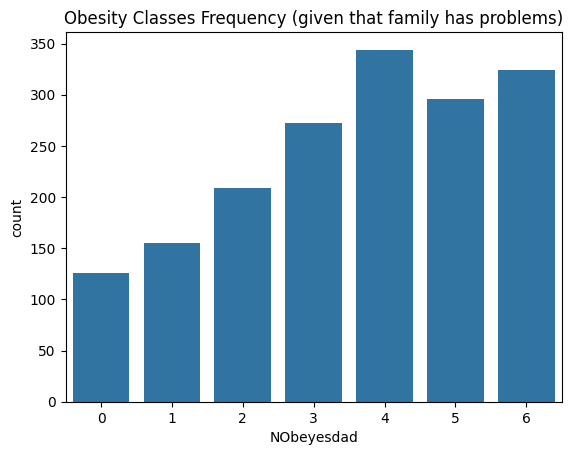

In [14]:
sns.countplot(families_with_problems, x="NObeyesdad")
plt.title("Obesity Classes Frequency (given that family has problems)");

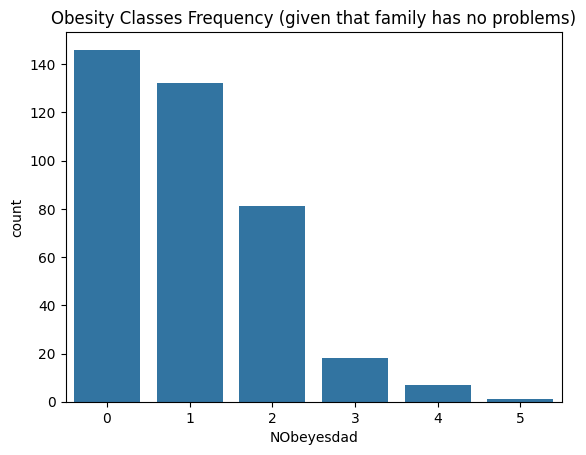

In [15]:
sns.countplot(families_without_problems, x="NObeyesdad")
plt.title("Obesity Classes Frequency (given that family has no problems)");

- Analyzing the frequency plots, it becomes evident that obesity does not solely stem from familial inheritance. Nevertheless, the skewed shapes of both plots—one depicting families with a history of obesity and the other without—highlight a noticeable association, indicating that individuals from families with a history of obesity tend to exhibit higher frequencies of obesity.


**The second question**

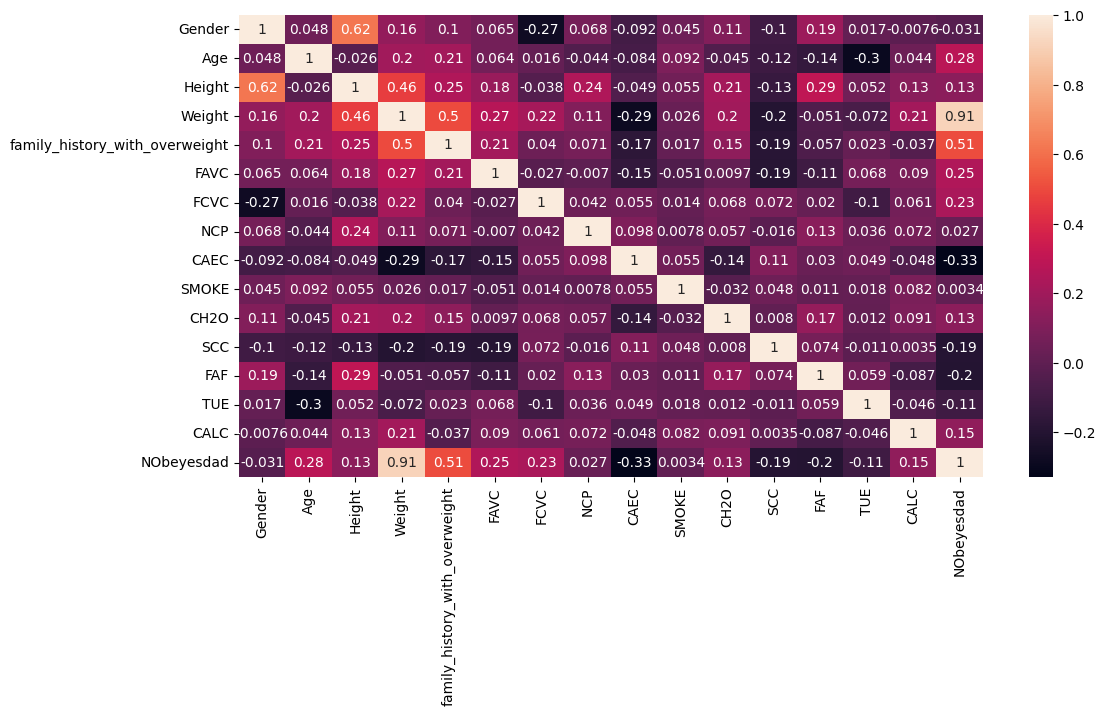

In [16]:
corr = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True);

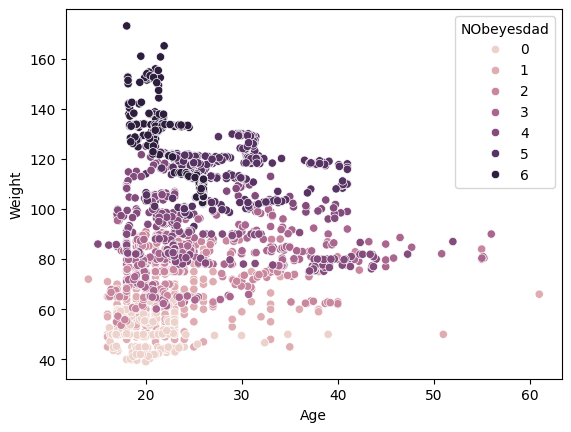

In [17]:
sns.scatterplot(df, x="Age", y="Weight", hue="NObeyesdad");

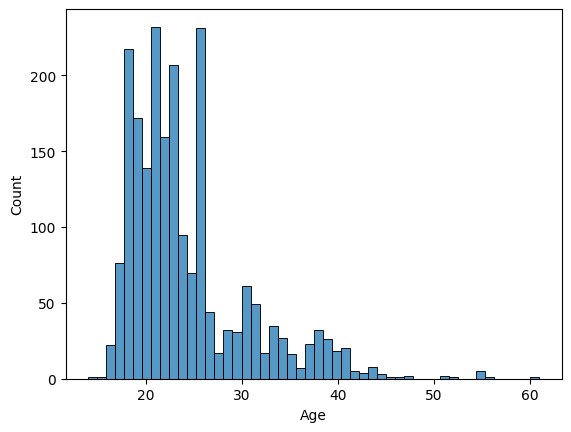

In [18]:
sns.histplot(df, x="Age");

- The correlation matrix and scatter plot analysis reveal that the recorded data does not demonstrate a robust correlation between age and weight. However, it's essential to acknowledge that the dataset's age distribution is biased towards younger ages, rendering the determination of this relationship inconclusive based solely on the available data.

**The third Question**

In [19]:
male_cases = df[df["Gender"]==1]
female_cases = df[df["Gender"]==0]



In [20]:
len(male_cases)

1068

In [21]:
len(female_cases)


1043

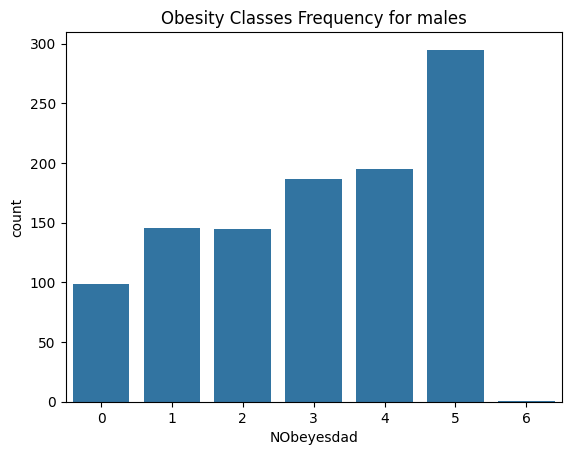

In [22]:
sns.countplot(male_cases, x="NObeyesdad")
plt.title("Obesity Classes Frequency for males");

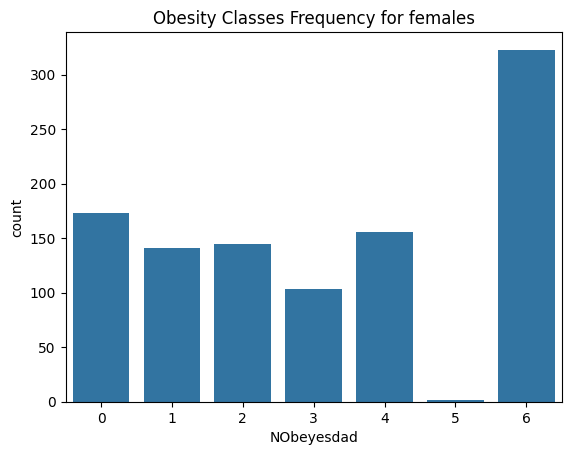

In [23]:
sns.countplot(female_cases, x="NObeyesdad")
plt.title("Obesity Classes Frequency for females");

- In males and females, the last two extreme obesity levels alternate.
- The moderate levels exhibit a higher prevalence among males.
- Inadequate weight is more frequently observed in females.

### Data Preprocessing

In [24]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3


In [25]:
#dropping unwanted columns
selected_df = df.drop(columns = ["SMOKE", "Height", "Age", "Weight"])

In [26]:
X, y = df.drop(columns=["NObeyesdad"]), df["NObeyesdad"]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_dimension = X.shape[1]
num_of_classes = 7

# Neural Networks

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix

**Model 1**

In [29]:
NN_1 = Sequential()

In [30]:
# adding the lyers of the NN model
NN_1.add(Dense(32, input_dim=input_dimension, activation='linear'))
NN_1.add(Dense(64, activation='relu'))
NN_1.add(Dense(num_of_classes, activation='softmax'))

In [31]:
NN_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# encoding the target variable/
y_train_nn = to_categorical(y_train, num_classes=7)
y_test_nn = to_categorical(y_test, num_classes=7)

In [33]:
y_train_nn


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [34]:
history = NN_1.fit(X_train.values, y_train_nn, epochs=100, batch_size=32)

Epoch 1/100




53/53 [==============================] - 3s 2ms/step - loss: 3.0077 - accuracy: 0.2186
Epoch 2/100
53/53 [==============================] - 0s 2ms/step - loss: 1.6094 - accuracy: 0.3152
Epoch 3/100
53/53 [==============================] - 0s 2ms/step - loss: 1.5441 - accuracy: 0.3430
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: 1.5041 - accuracy: 0.3525
Epoch 5/100
53/53 [==============================] - 0s 4ms/step - loss: 1.3928 - accuracy: 0.4230
Epoch 6/100
53/53 [==============================] - 0s 4ms/step - loss: 1.3246 - accuracy: 0.4491
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 1.3043 - accuracy: 0.4645
Epoch 8/100
53/53 [==============================] - 0s 3ms/step - loss: 1.2364 - accuracy: 0.4970
Epoch 9/100
53/53 [==============================] - 0s 3ms/step - loss: 1.1800 - accuracy: 0.5219
Epoch 10/100
53/53 [==============================] - 0s 4ms/step - loss: 1.1699 - accuracy: 0.5290
Epoch 11/100
53/53 

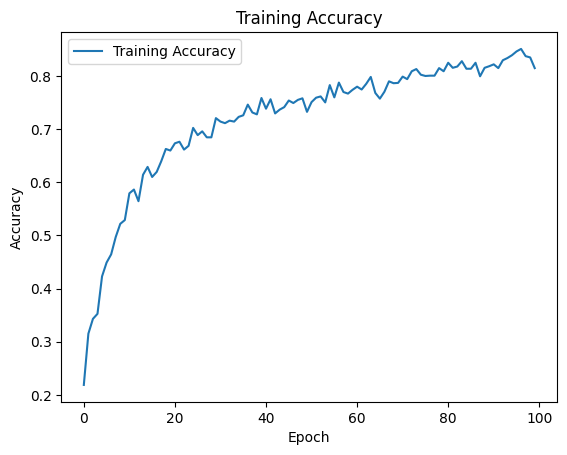

In [35]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

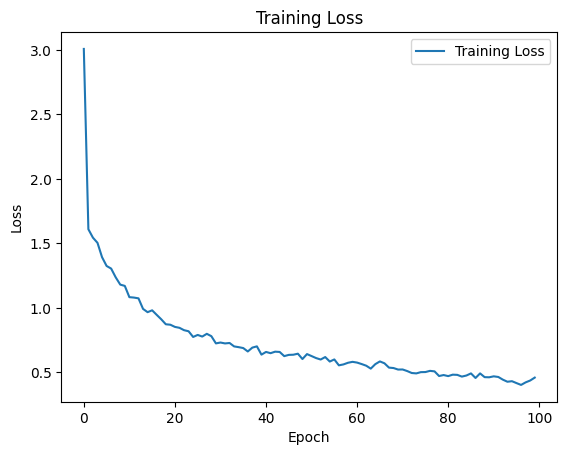

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
NN_1.evaluate(X_test, y_test_nn)

14/14 [==============================] - 0s 4ms/step - loss: 0.4213 - accuracy: 0.8392


[0.4212798476219177, 0.839243471622467]

**Model_2**

In [38]:
NN_2 = Sequential()

In [39]:
NN_2.add(Dense(32, input_dim=input_dimension, activation='relu'))
NN_2.add(Dense(64, activation='relu'))
NN_2.add(Dense(64, activation='relu'))
NN_2.add(Dense(128, activation='relu'))
NN_2.add(Dense(128, activation='relu'))
NN_2.add(Dense(64, activation='relu'))
NN_2.add(Dense(64, activation='relu'))
NN_2.add(Dense(num_of_classes, activation='softmax'))

In [40]:
NN_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
history = NN_2.fit(X_train.values, y_train_nn, epochs=100, batch_size=32)

Epoch 1/100
53/53 [==============================] - 0s 4ms/step - loss: 0.1047 - accuracy: 0.9621
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9805
Epoch 3/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0692 - accuracy: 0.9745
Epoch 4/100
53/53 [==============================] - 0s 5ms/step - loss: 0.1541 - accuracy: 0.9408
Epoch 5/100
53/53 [==============================] - 0s 6ms/step - loss: 0.0981 - accuracy: 0.9633
Epoch 6/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0702 - accuracy: 0.9763
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9775
Epoch 8/100
53/53 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9615
Epoch 9/100
53/53 [==============================] - 0s 4ms/step - loss: 0.1357 - accuracy: 0.9502
Epoch 10/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0758 - accuracy: 0.9692
Epoch 11/

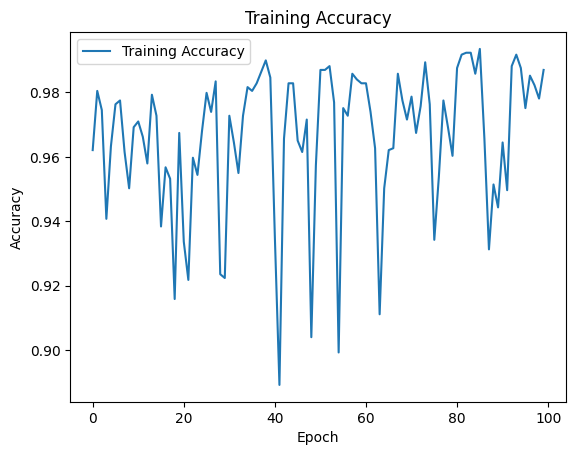

In [46]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

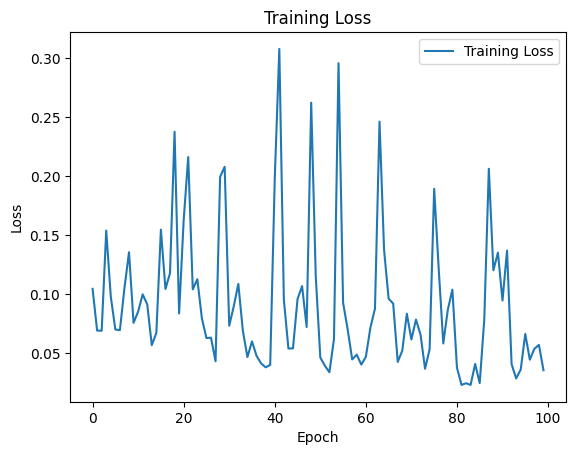

In [47]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
NN_2.evaluate(X_test, y_test_nn)

14/14 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.9196


[0.3676731586456299, 0.9196217656135559]

# KNN Model

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [50]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [51]:
scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [54]:
y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy,2)}')


Accuracy: 0.81


In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)

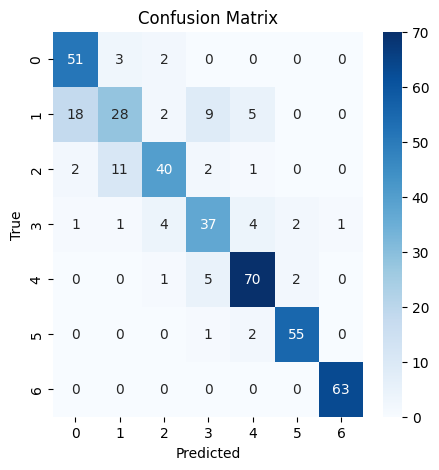

In [56]:
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logistic_model = LogisticRegression()

In [59]:
logistic_model.fit(X_train_scaled, y_train)

C:\Users\Morshedy\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:

y_pred = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8699763593380615


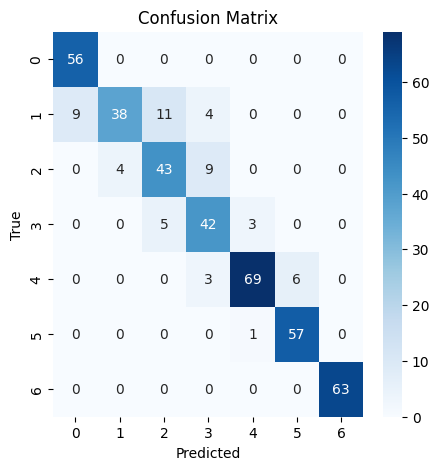

In [61]:
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [63]:
from sklearn.svm import SVC

In [64]:
svm_classifier = SVC(kernel='rbf', C=1)

In [65]:
svm_classifier.fit(X_train_scaled, y_train)

SVC(C=1)

In [66]:
y_pred = svm_classifier.predict(X_test_scaled)


In [67]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [68]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8888888888888888


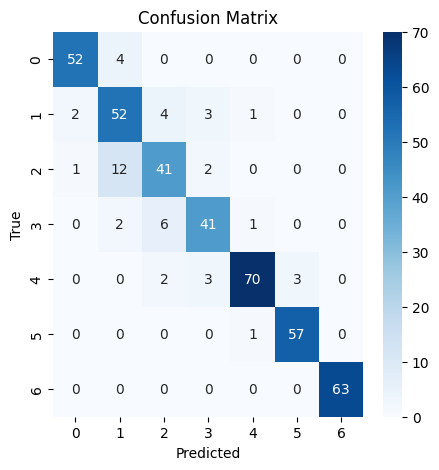

In [69]:
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes Classifier

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
nb_classifier = GaussianNB()

In [72]:
nb_classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [73]:
y_pred = nb_classifier.predict(X_test_scaled)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [76]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.640661938534279


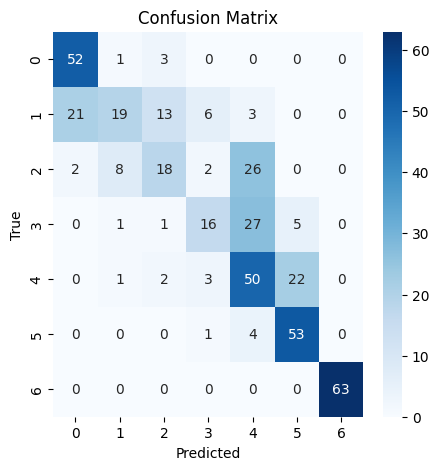

In [77]:
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# K-means

In [78]:
from sklearn.cluster import KMeans

In [79]:
kmeans = KMeans(n_clusters=num_of_classes)

In [80]:
kmeans.fit(X)

C:\Users\Morshedy\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7)

In [81]:
labels = kmeans.labels_

In [82]:
df_kmean = df.copy()
df_kmean.insert(2,"cluster_label", labels)

In [83]:
df_kmean.head()

,Gender,Age,cluster_label,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,0,21.0,1,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1
1,0,21.0,6,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1
2,1,23.0,5,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1
3,1,27.0,5,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2
4,1,22.0,5,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3


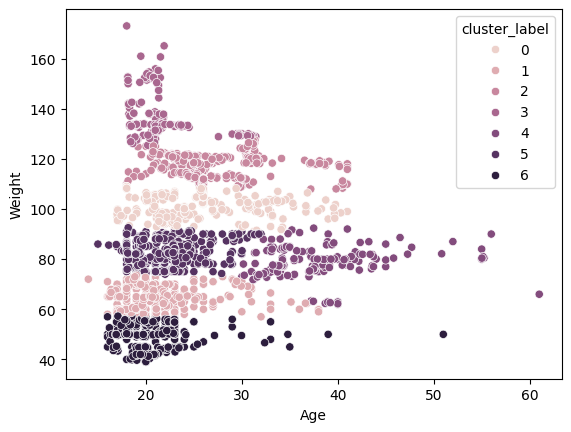

In [84]:
sns.scatterplot(df_kmean, x="Age", y="Weight", hue="cluster_label");

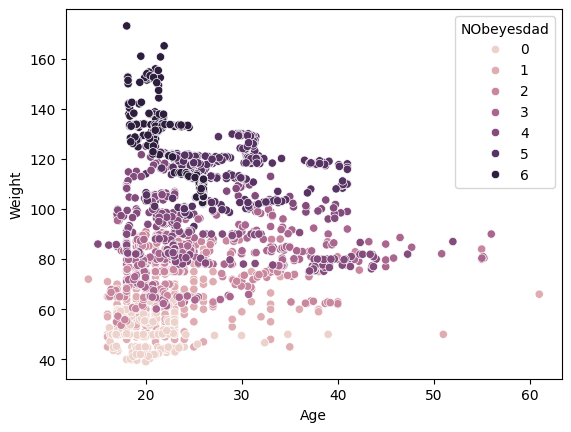

In [85]:
sns.scatterplot(df_kmean, x="Age", y="Weight", hue="NObeyesdad");

In this case, the cluster separation achieved through K-means is comparable, but not identical, to the assigned classes. It's important to note that the two graphs use different color codes to represent the clusters and classes.